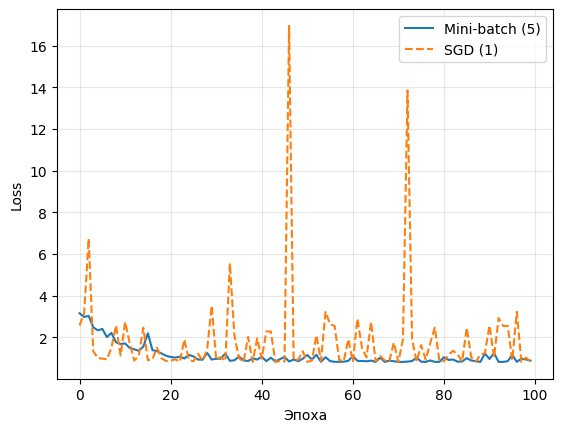

Финальные параметры: w = 6.0228, b = 2.1076
Финальный loss: 0.884793


In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.uniform(0, 10, 50)
y = 6*x + 2 + np.random.normal(0, 1, 50)


def SGD(x, y, w, b, lr, epochs, bs):
    loss_hist = []
    n = len(x)
    for _ in range(epochs):
        idx = np.random.permutation(n)
        xs, ys = x[idx], y[idx]
        for i in range(0, n, bs):
            xb, yb = xs[i:i+bs], ys[i:i+bs]
            m = len(xb)
            err = w*xb + b - yb
            w -= lr * (2/m)*np.sum(err*xb)
            b -= lr * (2/m)*np.sum(err)
        loss_hist.append(np.mean((w*x+b-y)**2))
    return w, b, loss_hist


w, b, loss_mb = SGD(x, y, 5, 5, 0.01, 100, 5)
_, _, loss_sgd = SGD(x, y, 5, 5, 0.01, 100, 1)
loss = np.mean((w*x+b-y)**2)

plt.plot(loss_mb, label='Mini-batch (5)')
plt.plot(loss_sgd, '--', label='SGD (1)')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Финальные параметры: w = {w:.4f}, b = {b:.4f}")
print(f"Финальный loss: {loss:.6f}")